In this notebook I will depict the heatmap and PCA based on X-chromosomal chunkcounts

In [1]:
import sys, os, re
import numpy as np
import pandas as pd
import scipy
from sklearn.decomposition import PCA
from sklearn import preprocessing

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'png')
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()
sns.set_theme()
sns.set_style("white")
sns.set_context("notebook")

Reading the data

In [2]:
chunkcounts_path = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis/steps/fs/all_autosomes_linked.chunkcounts.out"
metadata_path = "../data/Papio_metadata_with_clustering.txt"
chunkcounts = pd.read_csv(chunkcounts_path, sep=" ", header = 1, index_col=0)
metadata_samples = pd.read_csv(metadata_path, sep =" ")

Altering to match naming, and subset the metadata

In [3]:
metadata_samples["PGDP_ID"] = ["Sci_"+x if (x[0] != "P" and x[0] != "S")
                    else x for x in metadata_samples.PGDP_ID]

In [4]:
in_df = metadata_samples.loc[metadata_samples["PGDP_ID"].isin(chunkcounts.index)]

In [5]:
sorted_origin = in_df.sort_values(by=["C_origin"])

In [6]:
sorted_origin["PGDP_ID"].values

array(['PD_0741', 'PD_0727', 'PD_0728', 'PD_0729', 'PD_0730', 'PD_0731',
       'PD_0732', 'PD_0733', 'PD_0739', 'PD_0734', 'PD_0736', 'PD_0737',
       'PD_0744', 'PD_0743', 'PD_0742', 'PD_0720', 'PD_0740', 'PD_0735',
       'PD_0726', 'PD_0738', 'PD_0725', 'PD_0721', 'PD_0723', 'PD_0722',
       'PD_0724', 'PD_0492', 'PD_0674', 'PD_0675', 'PD_0676', 'PD_0677',
       'PD_0678', 'PD_0652', 'PD_0679', 'PD_0680', 'PD_0681', 'PD_0682',
       'PD_0684', 'PD_0685', 'PD_0686', 'PD_0493', 'PD_0494', 'PD_0496',
       'PD_0653', 'PD_0651', 'PD_0650', 'PD_0649', 'PD_0642', 'PD_0641',
       'PD_0654', 'PD_0509', 'PD_0508', 'PD_0507', 'PD_0505', 'PD_0504',
       'PD_0502', 'PD_0501', 'PD_0500', 'PD_0499', 'PD_0498', 'PD_0497',
       'PD_0495', 'PD_0506', 'PD_0683', 'PD_0266', 'PD_0220', 'PD_0267',
       'PD_0218', 'PD_0212', 'PD_0211', 'PD_0210', 'PD_0209', 'PD_0208',
       'PD_0207', 'PD_0206', 'PD_0205', 'PD_0204', 'PD_0203', 'PD_0202',
       'PD_0201', 'PD_0200', 'PD_0199', 'PD_0221', 

In [7]:
sorted_chunks = chunkcounts.reindex(sorted_origin["PGDP_ID"])
sorted_chunks = sorted_chunks.reindex(columns=sorted_origin["PGDP_ID"])
#sorted_chunks = sorted_chunks.set_index([])

Color palette

In [8]:
palette = sns.color_palette()
color_mapping = dict(zip(sorted_origin.C_origin.unique(), palette))
cluster_colors = sorted_origin["C_origin"].map(color_mapping)

In [9]:
cluster_colors

173    (0.2980392156862745, 0.4470588235294118, 0.690...
159    (0.2980392156862745, 0.4470588235294118, 0.690...
160    (0.2980392156862745, 0.4470588235294118, 0.690...
161    (0.2980392156862745, 0.4470588235294118, 0.690...
162    (0.2980392156862745, 0.4470588235294118, 0.690...
                             ...                        
66     (0.8549019607843137, 0.5450980392156862, 0.764...
126    (0.5490196078431373, 0.5490196078431373, 0.549...
124    (0.5490196078431373, 0.5490196078431373, 0.549...
125    (0.5490196078431373, 0.5490196078431373, 0.549...
127    (0.5490196078431373, 0.5490196078431373, 0.549...
Name: C_origin, Length: 223, dtype: object

Merging to create a full dataframe

The plot itself

In [10]:
pop_df = in_df.set_index('PGDP_ID') # Making a df with the individual names as index 
species = pop_df['C_origin'] # Extracting the column with the 'C_origin'
species_reindexed = species.reindex(chunkcounts.index) # Reindexing this to match the data
fs_new = pd.merge(chunkcounts, species_reindexed, left_index=True, right_index=True)
fs_new = fs_new.set_index([fs_new.index, 'C_origin'])
fs_new = fs_new.sort_index(level='C_origin')
fs_new.index = fs_new.index.droplevel(1)
fs_new = fs_new.reindex(columns=list(fs_new.index))

species_reindexed = species.reindex(fs_new.index)

In [11]:
clusters = species_reindexed.unique()
palette = sns.color_palette("tab10")
color_mapping = dict(zip(clusters, palette))
cluster_colors = species_reindexed.map(color_mapping)

In [12]:
species_reindexed

Recipient
PD_0720    Anubis, Ethiopia
PD_0721    Anubis, Ethiopia
PD_0722    Anubis, Ethiopia
PD_0723    Anubis, Ethiopia
PD_0724    Anubis, Ethiopia
                 ...       
PD_0401      Papio, Senegal
PD_0692     Ursinus, Zambia
PD_0693     Ursinus, Zambia
PD_0694     Ursinus, Zambia
PD_0695     Ursinus, Zambia
Name: C_origin, Length: 223, dtype: object

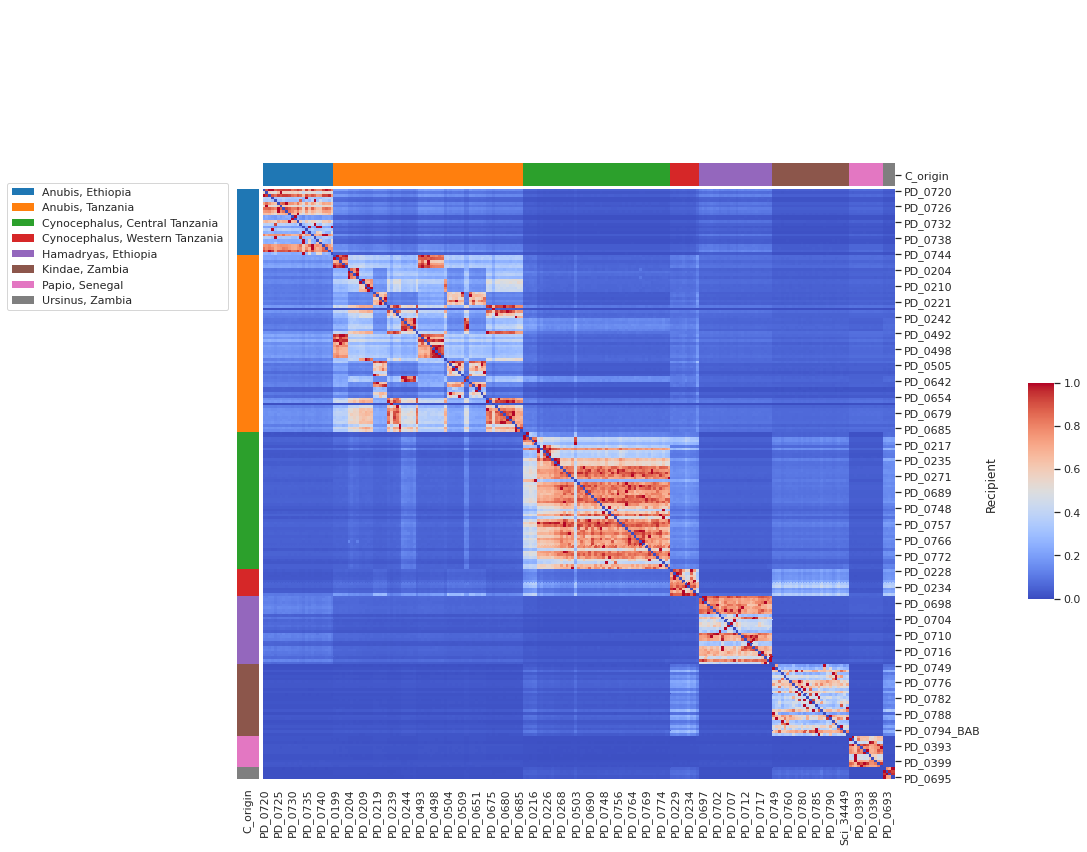

In [13]:
g = sns.clustermap(fs_new, cmap = 'coolwarm',
               row_colors=cluster_colors, col_colors=cluster_colors,
               row_cluster=False, col_cluster = False, # This is set to be false to preserve the order of the individuals
               standard_scale = 0, dendrogram_ratio=(.1, .2),
               cbar_pos=(1.02, .3, .03, .25), figsize=(12, 12))

for label in clusters:
    g.ax_row_dendrogram.bar(0, 0, color=color_mapping[label],
                            label=label, linewidth=0)

g.ax_row_dendrogram.legend(bbox_to_anchor=(1.02, 1.02)) #, bbox_to_anchor=(0.9, 0.5)

In [14]:
chunkcounts

,Sci_16066,Sci_16098,Sci_34449,Sci_34474,Sci_97074,Sci_97124,PD_0199,PD_0200,PD_0201,PD_0202,...,PD_0785,PD_0786,PD_0787,PD_0788,PD_0789,PD_0790,PD_0791,PD_0792,PD_0793,PD_0794_BAB
Recipient,,,,,,,,,,,,,,,,,,,,,
Sci_16066,0.000000,5845.444000,841.346827,807.123752,457.789422,455.868319,426.155158,417.112632,419.068203,420.476659,...,689.948076,692.029448,737.492113,667.120124,687.062644,690.190263,685.758235,665.487248,724.002284,691.378455
Sci_16098,5619.764760,0.000000,762.840102,767.182421,411.625345,437.422930,381.971654,383.409914,384.311786,394.963701,...,607.430049,617.022418,659.974519,625.251829,644.569958,620.027716,610.221614,623.878914,636.686795,597.366853
Sci_34449,1228.158930,1162.996720,0.000000,12265.083300,648.847371,657.863280,587.272785,581.714151,587.884561,581.220797,...,15363.690800,11384.733700,11635.803800,10514.759000,10564.535500,10683.968400,9991.982300,10499.158500,10820.727100,12598.279300
Sci_34474,1038.548940,1001.110810,10848.717900,0.000000,578.162976,600.397722,517.709951,518.697069,560.144108,533.238907,...,8920.151530,25980.894400,13345.316700,8877.157880,10686.138000,16493.315400,8900.996790,9126.513200,10749.376700,10118.775700
Sci_97074,333.311676,314.285747,324.694206,326.602524,0.000000,6540.685460,482.506622,507.157069,500.625981,487.818031,...,287.030099,274.014482,271.182737,282.534497,275.507373,267.828586,278.367684,281.992798,276.744929,266.307693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PD_0790,841.670854,790.419544,8620.305770,16065.899300,469.595173,475.752819,493.685256,504.493424,515.224321,497.284771,...,7815.921330,10791.805000,10388.078200,8328.771920,15652.613200,0.000000,9032.424210,9502.542090,13352.007400,12176.979400
PD_0791,591.296344,557.900108,6536.609110,6328.739440,341.681870,333.763269,359.296180,362.328225,361.265061,354.686528,...,5312.055430,5853.363780,6865.337220,6441.850520,8641.394080,7482.611550,0.000000,14330.213100,8282.751530,6722.732310
PD_0792,761.942521,763.242602,8623.016170,7860.553510,444.300078,449.039678,460.138155,447.478363,483.440429,463.616053,...,8637.460360,8389.728830,8482.810570,7817.929380,10398.469500,8896.463290,16890.582900,0.000000,8509.323960,8437.926800


In [15]:
species_reindexed

Recipient
PD_0720    Anubis, Ethiopia
PD_0721    Anubis, Ethiopia
PD_0722    Anubis, Ethiopia
PD_0723    Anubis, Ethiopia
PD_0724    Anubis, Ethiopia
                 ...       
PD_0401      Papio, Senegal
PD_0692     Ursinus, Zambia
PD_0693     Ursinus, Zambia
PD_0694     Ursinus, Zambia
PD_0695     Ursinus, Zambia
Name: C_origin, Length: 223, dtype: object

In [16]:
fs_new

,PD_0720,PD_0721,PD_0722,PD_0723,PD_0724,PD_0725,PD_0726,PD_0727,PD_0728,PD_0729,...,PD_0396,PD_0397,PD_0398,PD_0399,PD_0400,PD_0401,PD_0692,PD_0693,PD_0694,PD_0695
Recipient,,,,,,,,,,,,,,,,,,,,,
PD_0720,0.000000,6986.289460,7734.515430,7779.849540,6811.937190,7126.558670,7238.575230,7282.410350,7262.971280,7306.791380,...,565.548311,568.043713,565.933443,558.132565,571.848004,564.929174,356.525924,357.825387,344.669306,343.298685
PD_0721,6753.551200,0.000000,7274.668910,6569.157700,6311.378290,7977.748940,12309.989500,7091.634260,7143.690070,6909.057810,...,548.284825,540.329938,538.453235,545.310980,543.986918,548.606887,345.859727,350.440803,351.428811,344.604461
PD_0722,7991.149490,7563.682110,0.000000,7176.257800,6739.153000,7476.582650,7187.650310,7494.986710,7499.734000,7371.242360,...,566.790267,562.019723,554.026409,558.199843,568.405485,558.265784,349.994820,356.536509,350.593135,349.538663
PD_0723,7409.302110,6616.178690,6944.566340,0.000000,5786.839510,6518.979890,6527.807960,6981.958650,6451.107690,6442.574330,...,548.129433,530.697790,533.717223,537.254230,548.261094,542.630887,343.052362,330.997708,338.841078,336.348352
PD_0724,5641.030190,5404.826840,5704.597800,4846.494920,0.000000,5075.757110,4819.855680,5628.318940,5005.909170,4758.014090,...,444.041454,449.129184,452.391713,451.741188,454.522161,448.756744,284.610178,285.364731,285.745410,285.960554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PD_0401,180.536435,189.331877,185.830545,183.938240,177.044619,182.443976,185.272815,182.364176,192.804594,198.130454,...,5682.164090,5375.862810,5454.046040,5373.848900,6155.338380,0.000000,125.242211,118.271848,119.260621,120.529294
PD_0692,509.971132,507.778670,506.084908,500.190123,494.967378,498.295262,502.620767,489.159086,514.349917,495.705778,...,465.819237,469.638043,456.748435,453.593672,458.287558,465.765407,0.000000,49139.786800,44279.870800,63210.467100
PD_0693,571.719262,577.941621,582.133003,571.708256,559.482217,576.600683,574.040537,572.072885,577.557352,566.357251,...,514.446799,512.962656,516.587070,516.707582,512.057726,512.870011,53032.235000,0.000000,51556.873400,48913.342400


In [17]:
species_reindexed

Recipient
PD_0720    Anubis, Ethiopia
PD_0721    Anubis, Ethiopia
PD_0722    Anubis, Ethiopia
PD_0723    Anubis, Ethiopia
PD_0724    Anubis, Ethiopia
                 ...       
PD_0401      Papio, Senegal
PD_0692     Ursinus, Zambia
PD_0693     Ursinus, Zambia
PD_0694     Ursinus, Zambia
PD_0695     Ursinus, Zambia
Name: C_origin, Length: 223, dtype: object

PCA

In [18]:
pca = PCA(n_components=10)
X_normalized = preprocessing.normalize(sorted_chunks, norm='l2')
projection = pca.fit_transform(X_normalized)

print(pca.explained_variance_)

[0.17069212 0.11221407 0.09740139 0.06069023 0.05165698 0.03601212
 0.01662964 0.01137782 0.01026958 0.00543075]


In [19]:
merged_chunk_meta = pd.merge(sorted_chunks, in_df, on="PGDP_ID")

In [20]:
mycols = sns.color_palette(["#BEE39C", "#1F681F", "#FFE7AF",
                            "#FFD062", "#9EADB2", "#258CC1", "#EA3324", "#C06D34"])
name_order = sorted(merged_chunk_meta.C_origin.unique())
color_dir = {}
for i in range(len(name_order)):
    color_dir[name_order[i]] = mycols[i]
# This order of color is based on the alphabetical ordering of the 14 clusters
mycols_cmap = ListedColormap(mycols.as_hex())
mycols

[(0.7450980392156863, 0.8901960784313725, 0.611764705882353),
 (0.12156862745098039, 0.40784313725490196, 0.12156862745098039),
 (1.0, 0.9058823529411765, 0.6862745098039216),
 (1.0, 0.8156862745098039, 0.3843137254901961),
 (0.6196078431372549, 0.6784313725490196, 0.6980392156862745),
 (0.1450980392156863, 0.5490196078431373, 0.7568627450980392),
 (0.9176470588235294, 0.2, 0.1411764705882353),
 (0.7529411764705882, 0.42745098039215684, 0.20392156862745098)]

In [21]:
merged_chunk_meta["C_origin"].map(color_dir)

0      (0.7450980392156863, 0.8901960784313725, 0.611...
1      (0.7450980392156863, 0.8901960784313725, 0.611...
2      (0.7450980392156863, 0.8901960784313725, 0.611...
3      (0.7450980392156863, 0.8901960784313725, 0.611...
4      (0.7450980392156863, 0.8901960784313725, 0.611...
                             ...                        
218        (0.9176470588235294, 0.2, 0.1411764705882353)
219    (0.7529411764705882, 0.42745098039215684, 0.20...
220    (0.7529411764705882, 0.42745098039215684, 0.20...
221    (0.7529411764705882, 0.42745098039215684, 0.20...
222    (0.7529411764705882, 0.42745098039215684, 0.20...
Name: C_origin, Length: 223, dtype: object

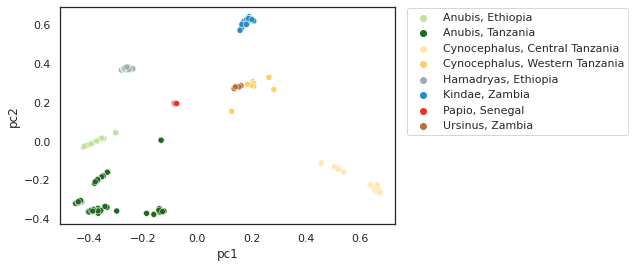

In [22]:
pcx, pcy = 0, 1
g = sns.scatterplot(x=projection[:,pcx], y=projection[:,pcy], hue=merged_chunk_meta["C_origin"], palette=color_dir)
g.legend(bbox_to_anchor=(1.02, 1.02))
g.set(xlabel="pc{}".format(pcx+1), ylabel="pc{}".format(pcy+1))

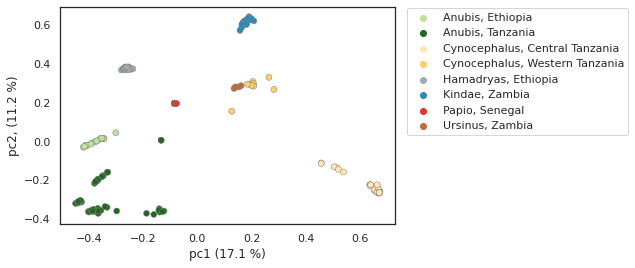

In [23]:
pcx, pcy = 0, 1
g = sns.scatterplot(x=projection[:,pcx], y=projection[:,pcy], hue=merged_chunk_meta["C_origin"], palette=color_dir,
                   edgecolor="gray")
g.legend(bbox_to_anchor=(1.02, 1.02))
g.set(xlabel="pc{} (17.1 %)".format(pcx+1), ylabel="pc{}, (11.2 %)".format(pcy+1))
plt.savefig("../figures/pca_pc1_pc2.png", dpi=300, bbox_inches='tight')

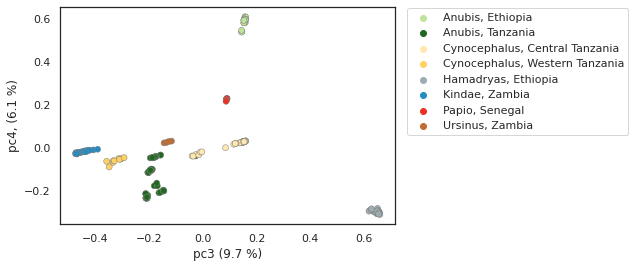

In [24]:
pcx, pcy = 2, 3
g = sns.scatterplot(x=projection[:,pcx], y=projection[:,pcy], hue=merged_chunk_meta["C_origin"], palette=color_dir,
                   edgecolor="gray")
g.legend(bbox_to_anchor=(1.02, 1.02))
g.set(xlabel="pc{} (9.7 %)".format(pcx+1), ylabel="pc{}, (6.1 %)".format(pcy+1))
plt.savefig("../figures/pca_pc3_pc4.png", dpi=300, bbox_inches='tight')

[Text(0.5, 0, 'pc3 (9.7 %)'), Text(0, 0.5, 'pc2, (11.2 %)')]

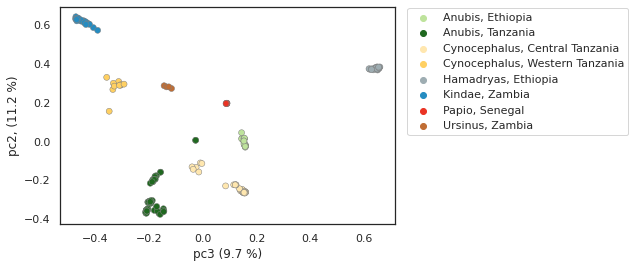

In [25]:
pcx, pcy = 2, 1
g = sns.scatterplot(x=projection[:,pcx], y=projection[:,pcy], hue=merged_chunk_meta["C_origin"], palette=color_dir,
                   edgecolor="gray")
g.legend(bbox_to_anchor=(1.02, 1.02))
g.set(xlabel="pc{} (9.7 %)".format(pcx+1), ylabel="pc{}, (11.2 %)".format(pcy+1))


In [26]:
pc_df = pd.DataFrame(projection, columns=["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10"])
merged_chunk_meta_pcs = pd.concat([pc_df, merged_chunk_meta], axis=1)

In [27]:
merged_chunk_meta_pcs.loc[(merged_chunk_meta_pcs.C_origin == "Anubis, Tanzania") & (merged_chunk_meta_pcs.pc1 > -0.2)]

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,Provider,Genus,Species,Origin,Sex,address,longitude,latitude,callset_index,C_origin
28,-0.133744,0.004262,-0.027487,-0.038228,0.125274,-0.122570,-0.044490,0.245565,-0.115153,0.515886,...,Knauf/Chuma/Roos,Papio,anubis,"Lake Manyara, Tanzania",F,"Lake Manyara, Babati, Manyara, Northern Zone, ...",35.806488,-3.622210,108,"Anubis, Tanzania"
46,-0.139111,-0.364056,-0.149990,-0.202686,-0.023907,-0.224706,0.040686,0.001324,-0.132482,-0.239133,...,Knauf/Chuma/Roos,Papio,anubis,"Tarangire, Tanzania",M,"Tarangire, Dar es Salaam, Coastal Zone, 34588 ...",39.210736,-6.708198,96,"Anubis, Tanzania"
47,-0.123433,-0.358584,-0.145210,-0.199688,-0.022450,-0.216385,0.045240,-0.001817,-0.135718,-0.249550,...,Knauf/Chuma/Roos,Papio,anubis,"Tarangire, Tanzania",F,"Tarangire, Dar es Salaam, Coastal Zone, 34588 ...",39.210736,-6.708198,95,"Anubis, Tanzania"
63,-0.187896,-0.370339,-0.163983,-0.209118,-0.024597,-0.228135,0.038167,-0.001159,-0.124392,-0.216758,...,Knauf/Chuma/Roos,Papio,anubis,"Tarangire, Tanzania",M,"Tarangire, Dar es Salaam, Coastal Zone, 34588 ...",39.210736,-6.708198,57,"Anubis, Tanzania"
65,-0.140837,-0.346651,-0.147114,-0.197063,-0.018438,-0.221498,0.043999,0.005559,-0.134169,-0.255042,...,Knauf/Chuma/Roos,Papio,anubis,"Tarangire, Tanzania",M,"Tarangire, Dar es Salaam, Coastal Zone, 34588 ...",39.210736,-6.708198,58,"Anubis, Tanzania"
84,-0.161002,-0.375901,-0.159353,-0.207389,-0.029204,-0.219865,0.043458,-0.007232,-0.122690,-0.217901,...,Knauf/Chuma/Roos,Papio,anubis,"Tarangire, Tanzania",F,"Tarangire, Dar es Salaam, Coastal Zone, 34588 ...",39.210736,-6.708198,56,"Anubis, Tanzania"
85,-0.142469,-0.354226,-0.148110,-0.197918,-0.019581,-0.224272,0.040812,0.004832,-0.134847,-0.248972,...,Knauf/Chuma/Roos,Papio,anubis,"Tarangire, Tanzania",F,"Tarangire, Dar es Salaam, Coastal Zone, 34588 ...",39.210736,-6.708198,55,"Anubis, Tanzania"
86,-0.128916,-0.361537,-0.146179,-0.199622,-0.023819,-0.218177,0.040342,-0.001612,-0.128394,-0.245397,...,Knauf/Chuma/Roos,Papio,anubis,"Tarangire, Tanzania",F,"Tarangire, Dar es Salaam, Coastal Zone, 34588 ...",39.210736,-6.708198,54,"Anubis, Tanzania"
90,-0.134241,0.004894,-0.026663,-0.036084,0.124826,-0.123314,-0.044440,0.245497,-0.112527,0.511669,...,Knauf/Chuma/Roos,Papio,anubis,"Lake Manyara, Tanzania",F,"Lake Manyara, Babati, Manyara, Northern Zone, ...",35.806488,-3.622210,50,"Anubis, Tanzania"


[Text(0.5, 0, 'pc3'), Text(0, 0.5, 'pc4')]

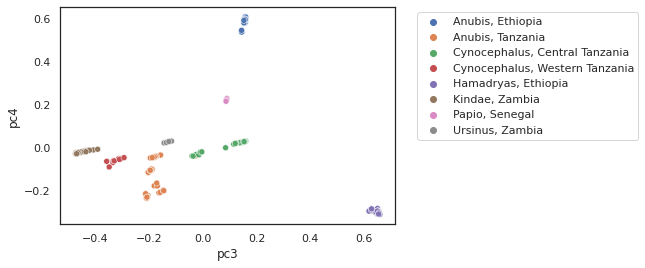

In [28]:
pcx, pcy = 2, 3
g = sns.scatterplot(x=projection[:,pcx], y=projection[:,pcy], hue=merged_chunk_meta["C_origin"])
g.legend(bbox_to_anchor=(1.05, 1))
g.set(xlabel="pc{}".format(pcx+1), ylabel="pc{}".format(pcy+1))

[Text(0.5, 0, 'pc5'), Text(0, 0.5, 'pc6')]

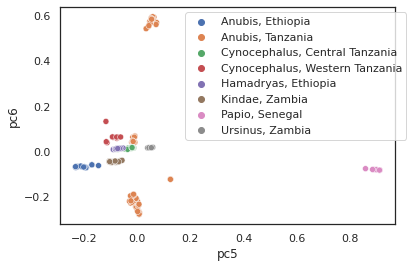

In [29]:
pcx, pcy = 4, 5
g = sns.scatterplot(x=projection[:,pcx], y=projection[:,pcy], hue=merged_chunk_meta["C_origin"])
g.legend(bbox_to_anchor=(1.05, 1))
g.set(xlabel="pc{}".format(pcx+1), ylabel="pc{}".format(pcy+1))

In [30]:
cluster_colors

Recipient
PD_0720    (0.12156862745098039, 0.4666666666666667, 0.70...
PD_0721    (0.12156862745098039, 0.4666666666666667, 0.70...
PD_0722    (0.12156862745098039, 0.4666666666666667, 0.70...
PD_0723    (0.12156862745098039, 0.4666666666666667, 0.70...
PD_0724    (0.12156862745098039, 0.4666666666666667, 0.70...
                                 ...                        
PD_0401    (0.8901960784313725, 0.4666666666666667, 0.760...
PD_0692    (0.4980392156862745, 0.4980392156862745, 0.498...
PD_0693    (0.4980392156862745, 0.4980392156862745, 0.498...
PD_0694    (0.4980392156862745, 0.4980392156862745, 0.498...
PD_0695    (0.4980392156862745, 0.4980392156862745, 0.498...
Name: C_origin, Length: 223, dtype: object